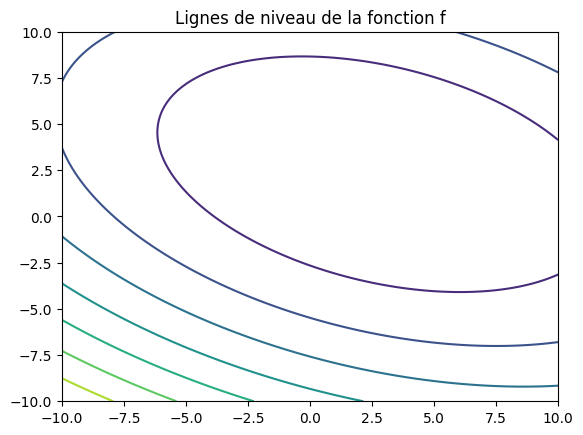

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(v):
    return (v[0] - 4)**2 + 2 *(v[1] - 3)**2 + v[0]*v[1]

x = np.linspace(-10,10,101)
y = np.linspace(-10,10,101)

X,Y = np.meshgrid(x,y)
Z = f(np.stack((X,Y)))
plt.contour(X,Y,Z)
plt.title("Lignes de niveau de la fonction f")
plt.show()

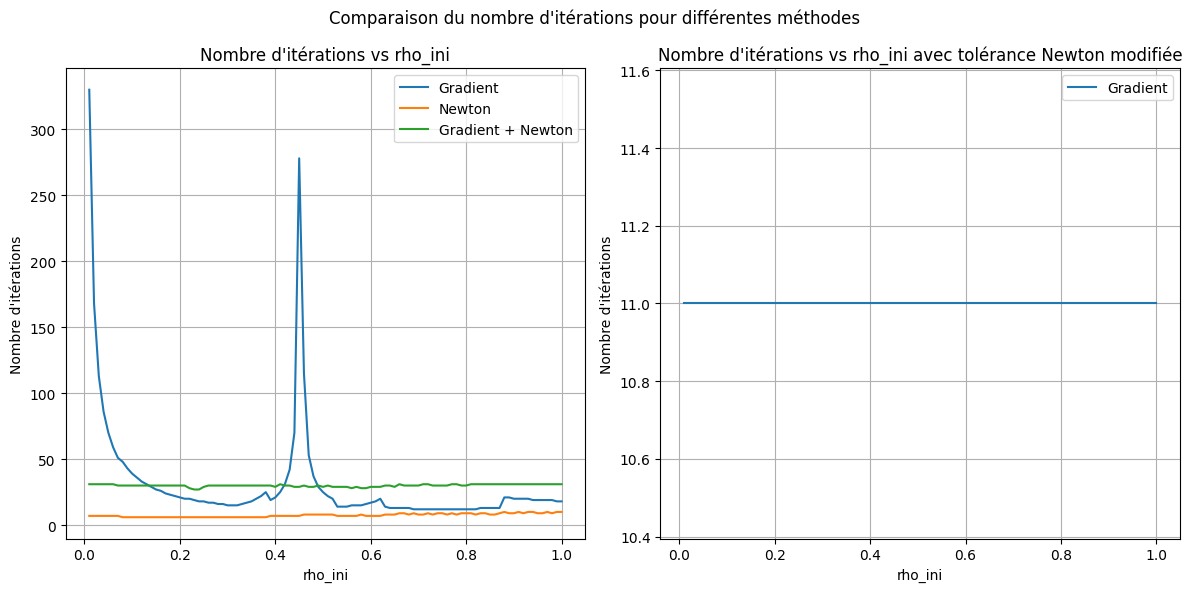

In [4]:
def f(v1,v2):
    return (v1-4)**2 + 2 * (v2-3)**2 + v1*v2

def gradf(v1,v2):
    return np.array([2*(v1-4) + v2, 4*(v2-3) + v1])

def gprime(rho,gradf,v):
    var1 = v - rho * gradf(v[0],v[1])
    var2 = gradf(var1[0],var1[1])
    var3 = -gradf(v[0],v[1]) @ var2
    return var3
 
def newton(gprime,gradf,x,rho_ini,tol,NitMax):
    k = 0
    rho = rho_ini
    delta = 1e-8
    critere_arret = gprime(rho,gradf,x)
    while(k < NitMax) and np.abs(critere_arret) > tol:
        rho = rho - delta * ( gprime(rho,gradf,x) / ( gprime(rho + delta, gradf,x) - gprime(rho,gradf,x) ) )
        k += 1
        critere_arret = gprime(rho,gradf,x)  # mise à jours
    if(k == NitMax):
        convergence = False
    else:
        convergence = True
    return rho,k,convergence

def gradopt(u_0,rho_0,tol_Gradient,tol_Newton,gradf,gprime,NitMax_Gradient,NitMax_Newton):
    u = u_0
    IterMax_gradient = 0
    IterMax_Newton = 0 # Initialisation à l'extérieur de la boucle, sinon si le test ne s'éxicute pas il connait pas la variable Itermax_newton, il sait pas quoi retourner

    direction_descente = gradf(u[0],u[1])

    while( IterMax_gradient < NitMax_Gradient and np.linalg.norm( direction_descente) > tol_Gradient  ):
        rho,k_Newton,_ = newton(gprime,gradf,u,rho_0,tol_Newton,NitMax_Newton)  #rho optimale par Newton à chaque étape 
                                                                    #qui dépend de u donc il change à chaque iteration du gradient
        IterMax_Newton += k_Newton
        #IterMax_newton += 1
        u = u - rho * direction_descente
        direction_descente = gradf(u[0],u[1]) #mise à jours
        IterMax_gradient += 1
    if(IterMax_gradient == NitMax_Gradient):
        convergence_gradient = False
    else:
        convergence_gradient = True

    return u,IterMax_gradient,IterMax_Newton,convergence_gradient

u_ini = np.array([1,1])
#rho_ini = np.linspace(0.01,1,0.01)  faux
rho_ini = np.arange(0.01, 1.01, 0.01)  # faire varié l'intervalle 0.01 à 1 avec un pas de 0.01, on peut pas faire ça par linspace car elle prend un pas entier
tol_Newton = 1e-6
tol_Gradient = 1e-6
NitMax_Gradient = 500
NitMax_Newton = 10

Nbr_Iter_grad = np.zeros(len(rho_ini))
Nbr_Iter_newton = np.zeros(len(rho_ini))
Cvgce_rho = np.zeros(len(rho_ini))
Nbr_total_Iter_Grad_Plus_Newton = []
for i in range(len(rho_ini)):
    u,IterMax_gradient,IterMax_newton,convergence_gradient = gradopt(u_ini,rho_ini[i],tol_Gradient,tol_Newton,gradf,gprime,NitMax_Gradient,NitMax_Newton)
    Nbr_Iter_grad[i] = IterMax_gradient
    Nbr_Iter_newton[i] = IterMax_newton
    Cvgce_rho[i] = convergence_gradient
    Nbr_total_Iter_Grad_Plus_Newton.append(IterMax_gradient + IterMax_newton)
Nbr_total_Iter_Grad_Plus_Newton = np.array(Nbr_total_Iter_Grad_Plus_Newton)

# Newton tol 10^-12
tol_Newton_modf = 1e-12
Nbr_Iter = np.zeros(len(rho_ini))
Cvgce_rho = np.zeros(len(rho_ini))
Nbr_total_Iter_Grad_Plus_Newton = []
for i in range(len(rho_ini)):
    u,IterMax_gradient,IterMax_newton,convergence_gradient = gradopt(u_ini,rho_ini[i],tol_Gradient,tol_Newton_modf,gradf,gprime,NitMax_Gradient,NitMax_Newton)
    Nbr_Iter[i] = IterMax_gradient
    Cvgce_rho[i] = convergence_gradient
    Nbr_total_Iter_Grad_Plus_Newton.append(IterMax_gradient + IterMax_newton)
Nbr_total_Iter_Grad_Plus_Newton = np.array(Nbr_total_Iter_Grad_Plus_Newton)
plt.figure(figsize=(12, 6))

# Premier plot : nombre d'itérations vs rho_ini
plt.subplot(1, 2, 1)
plt.plot(rho_ini, Nbr_Iter_grad, label='Gradient')
plt.plot(rho_ini, Nbr_Iter_newton, label='Newton')
plt.plot(rho_ini, Nbr_total_Iter_Grad_Plus_Newton, label='Gradient + Newton')
plt.title("Nombre d'itérations vs rho_ini")
plt.xlabel('rho_ini')
plt.ylabel("Nombre d'itérations")
plt.legend()
plt.grid(True)

# Deuxième plot : nombre d'itérations vs rho_ini avec tolérance Newton modifiée
plt.subplot(1, 2, 2)
plt.plot(rho_ini, Nbr_Iter, label='Gradient')
plt.title("Nombre d'itérations vs rho_ini avec tolérance Newton modifiée")
plt.xlabel('rho_ini')
plt.ylabel("Nombre d'itérations")
plt.legend()
plt.grid(True)

# Titre global
plt.suptitle('Comparaison du nombre d\'itérations pour différentes méthodes')

# Afficher le graphique
plt.tight_layout()
plt.show()
# on remarque que lorsque on modifer la tolérence la méthode de Newton diverge



modification de Gradopt

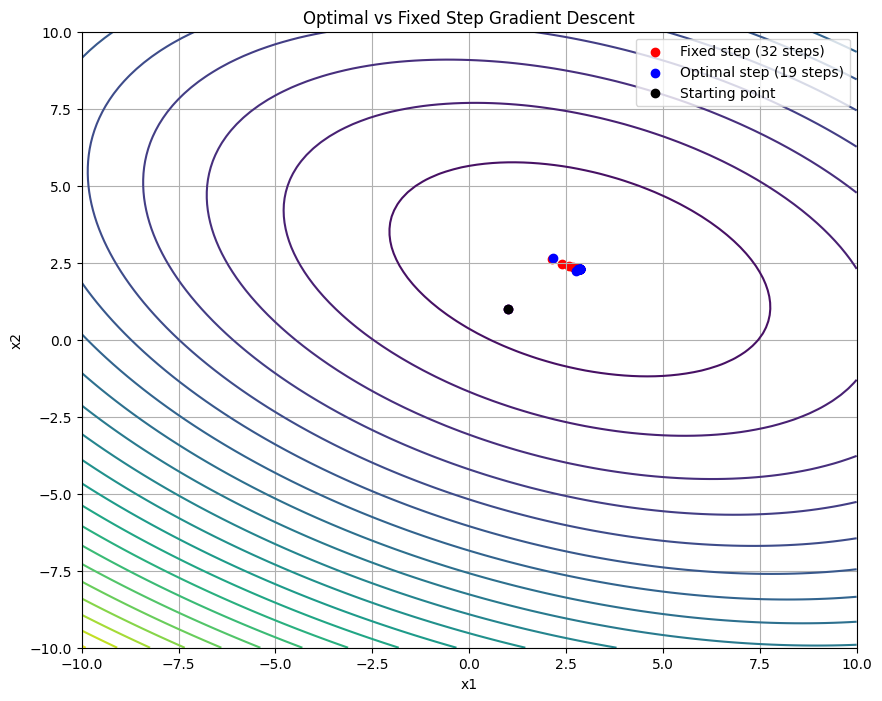

In [5]:
def f(v1,v2):
    return (v1-4)**2 + 2 * (v2-3)**2 + v1*v2

def gradf(v1,v2):
    return np.array([2*(v1-4) + v2, 4*(v2-3) + v1])

def gprime(rho,gradf,v):
    var1 = v - rho * gradf(v[0],v[1])
    var2 = gradf(var1[0],var1[1])
    var3 = -gradf(v[0],v[1]) @ var2
    return var3
 
def newton(gprime,gradf,x,rho_ini,tol,NitMax):
    k = 0
    rho = rho_ini
    delta = 1e-8
    critere_arret = gprime(rho,gradf,x)
    while(k < NitMax and np.linalg.norm(critere_arret) > tol):  # fait attention au critere d'arret de la methode de Newton lorsque F(x) = 0 le critere d'arret est F(x) < epsilon
        rho = rho - delta * ( gprime(rho,gradf,x) / ( gprime(rho + delta, gradf,x) - gprime(rho,gradf,x) ) )
        k += 1
        critere_arret = gprime(rho,gradf,x)  # mise à jours
    if(k == NitMax):
        convergence = False
    else:
        convergence = True
    return rho,k,convergence

def gradopt(u_0,rho_0,tol_Gradient,tol_Newton,gradf,gprime,NitMax_Gradient,NitMax_Newton):
    u = u_0
    IterMax_gradient = 0
    Suite_valeus = []
    Suite_valeus.append(u)
    direction_descente = gradf(u[0],u[1])

    while( IterMax_gradient < NitMax_Gradient and np.linalg.norm( direction_descente) > tol_Gradient  ):
        rho,k_Newton,_ = newton(gprime,gradf,u,rho_0,tol_Newton,NitMax_Newton)
        IterMax_Newton = k_Newton + 1
        u = u - rho * direction_descente
        direction_descente = gradf(u[0],u[1])
        IterMax_gradient += 1
        Suite_valeus.append(u)

    return Suite_valeus,IterMax_gradient

def grad_fix_step(u_0,rho_0,tol_Gradient,gradf,NitMax_Gradient):
    u = u_0
    IterMax_gradient = 0
    Suite_valeus = []
    Suite_valeus.append(u_0)
    while(IterMax_gradient < NitMax_Gradient and np.linalg.norm(gradf(u[0],u[1]))> tol_Gradient):
        u = u - rho_0 * gradf(u[0],u[1])
        IterMax_gradient += 1
        Suite_valeus.append(u)
    return Suite_valeus,IterMax_gradient
index_rho_min = np.argmin(Nbr_total_Iter_Grad_Plus_Newton)
rho_0 = rho_ini[index_rho_min] # on prend le meilleur rho, qui minimise le nombre d'itérations nécessaires
Points_List_optimal_step,IterMax_gradient_optimal_step = gradopt(u_ini,rho_0,tol_Gradient,tol_Newton,gradf,gprime,NitMax_Gradient,NitMax_Newton)
Points_List_fixed_step,IterMax_gradient_fix_step = grad_fix_step(u_ini,rho_0,tol_Gradient,gradf,NitMax_Gradient)
points_optimal_step_array = np.vstack(Points_List_optimal_step)
points_fixed_step_array = np.vstack(Points_List_fixed_step)
plt.figure(figsize=(10, 8))

# Tracer la fonction de contour
plt.contour(X,Y,f(X,Y), levels=20)

# Tracer les points avec une étape fixe
plt.scatter(points_fixed_step_array[:,0], points_fixed_step_array[:,1], color='red', label=f'Fixed step ({IterMax_gradient_fix_step} steps)')

# Tracer les points avec une étape optimale
plt.scatter(points_optimal_step_array[:,0], points_optimal_step_array[:,1], color='blue', label=f'Optimal step ({IterMax_gradient_optimal_step} steps)')

# Tracer le point de départ
plt.scatter(u_ini[0], u_ini[1], color='black', label='Starting point')

# Ajouter légendes et titre
plt.legend()
plt.title('Optimal vs Fixed Step Gradient Descent')
plt.xlabel('x1')
plt.ylabel('x2')

# Afficher le graphique
plt.grid(True)
plt.show()